In [20]:
import geopandas as gpd
import shapely.ops as sh
import pickle
import os
import numpy as np
import vis_methods as vs
import datetime as dt

In [11]:
river_path = r'C:\Users\bpara\Geo data\ne_10m_rivers_lake_centerlines\ne_10m_rivers_lake_centerlines.shp'

In [12]:
main_path = r'C:\Users\bpara\Geo data\Correlation Results'

with open(os.path.join(main_path, r'amo corr'), 'rb') as f:
    amo_data = pickle.load(f)
        
with open(os.path.join(main_path, r'Nina corr'), 'rb') as f:
    nina_data = pickle.load(f)
        
with open(os.path.join(main_path, r'Nino corr'), 'rb') as f:
    nino_data = pickle.load(f)
        
with open(os.path.join(main_path, r'pdo corr'), 'rb') as f:
    pdo_data = pickle.load(f)
    
with open(os.path.join(main_path, r'pna corr'), 'rb') as f:
    pna_data = pickle.load(f)
        
with open("flood rank", 'rb') as f:
    flood_data = pickle.load(f)

In [13]:
shapefile = gpd.read_file(river_path)

In [14]:
def merge_rivers(indicies, file):
    rivers = []
    for i in indicies:
        for l in file["geometry"][i]:
            rivers.append(l)
    return sh.linemerge(rivers)

In [15]:
mississippi_basin = merge_rivers([233, 234, 588, 1258, 1259, 1293, 205], shapefile)

In [16]:
#takes a shapely multiline segment, and compresses it down to a list of ordered pairs (tuples) which are rounded to the nearest 0.05 degrees
def get_point_list(mls):
    point_list = []
    for segment in mls:
        for coord in segment.coords:
            point_list.append((round(round(coord[0], 1) + 0.05, 2), round(round(coord[1], 1) + 0.05, 2)))
            point_list.append((round(round(coord[0], 1) + 0.15, 2), round(round(coord[1], 1) + 0.15, 2)))
            point_list.append((round(round(coord[0], 1) + 0.15, 2), round(round(coord[1], 1) + 0.05, 2)))
            point_list.append((round(round(coord[0], 1) + 0.05, 2), round(round(coord[1], 1) + 0.15, 2)))
            point_list.append((round(round(coord[0], 1) - 0.05, 2), round(round(coord[1], 1) + 0.05, 2)))
            point_list.append((round(round(coord[0], 1) + 0.05, 2), round(round(coord[1], 1) - 0.05, 2)))
            point_list.append((round(round(coord[0], 1) - 0.05, 2), round(round(coord[1], 1) - 0.05, 2)))
            point_list.append((round(round(coord[0], 1) - 0.05, 2), round(round(coord[1], 1) + 0.15, 2)))
            point_list.append((round(round(coord[0], 1) + 0.15, 2), round(round(coord[1], 1) - 0.05, 2)))
            point_list = list(dict.fromkeys(point_list))
            
    return point_list

In [17]:
trimmed_rivers = get_point_list(mississippi_basin)
file = open("mississippi points list", "wb")
pickle.dump(trimmed_rivers, file)
file.close()

In [21]:
#this replaces every value not at a point in the trimmed rivers data set with NaN so it won't be graphed by matplotlib
def trim_to_river(river_points, data, datakey):
    t1 = dt.datetime.now()
    result = data.copy()
    for lat_i in range(len(result["lat"])):
        for lon_i in range(len(result["lon"])):
            point = (round(data["lon"][lon_i],2), round(result["lat"][lat_i], 2))
            if point not in river_points:
                result[datakey][lat_i][lon_i] = np.nan
    print("Done in " + str(dt.datetime.now() - t1))
    return result

In [22]:
amo_trimmed = trim_to_river(trimmed_rivers, amo_data, "pearson")
pdo_trimmed = trim_to_river(trimmed_rivers, pdo_data, "pearson")
nino_trimmed = trim_to_river(trimmed_rivers, nino_data, "pearson")
nina_trimmed = trim_to_river(trimmed_rivers, nina_data, "pearson")
pna_trimmed = trim_to_river(trimmed_rivers, pna_data, "pearson")
flood_trimmed = trim_to_river(trimmed_rivers, flood_data, "position")

Done in 0:00:16.819674
Done in 0:00:16.845975
Done in 0:00:19.850350
Done in 0:00:18.040294
Done in 0:00:17.606346
Done in 0:00:17.892986


0
223


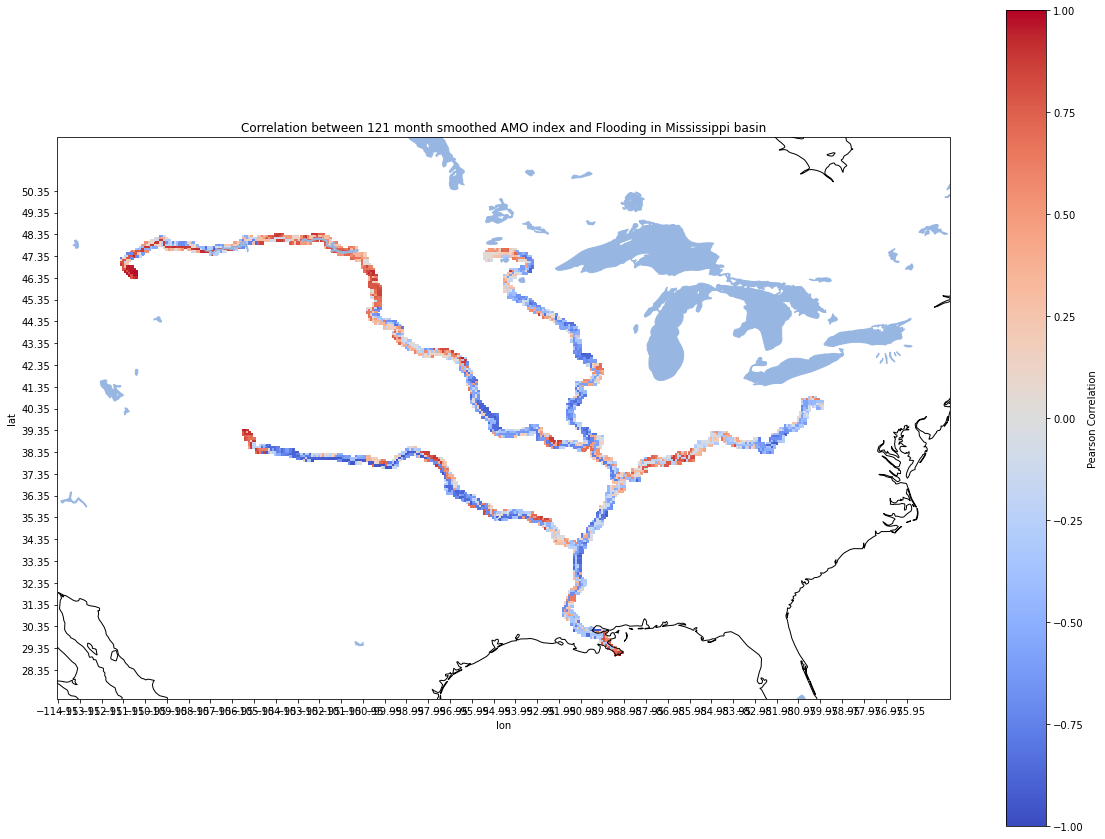

In [23]:
vs.plot_data(amo_data["lon"], amo_data["lat"], np.asarray(amo_data["pearson"]), "Pearson Correlation", "Correlation between 121 month smoothed AMO index and Flooding in Mississippi basin",
         lon_min =-115 , lon_max=-74, lat_min =51 , lat_max =27, has_scale_bounds = True, scale_min = -1, scale_max = 1, has_rivers = False, file_name = "AMO plot")

0
223


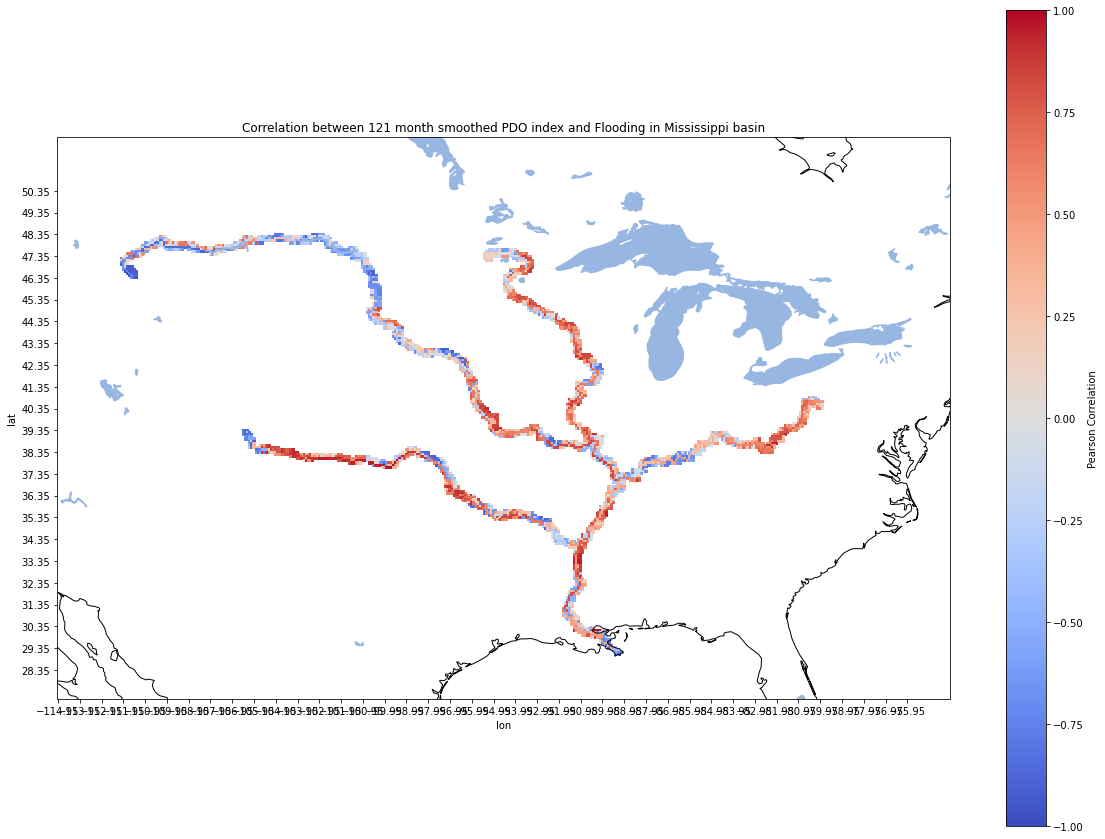

In [24]:
vs.plot_data(pdo_data["lon"], pdo_data["lat"], np.asarray(pdo_data["pearson"]), "Pearson Correlation", "Correlation between 121 month smoothed PDO index and Flooding in Mississippi basin",
         lon_min =-115 , lon_max=-74, lat_min =51 , lat_max =27, has_scale_bounds = True, scale_min = -1, scale_max = 1, has_rivers = False, file_name = "PDO plot")

0
223


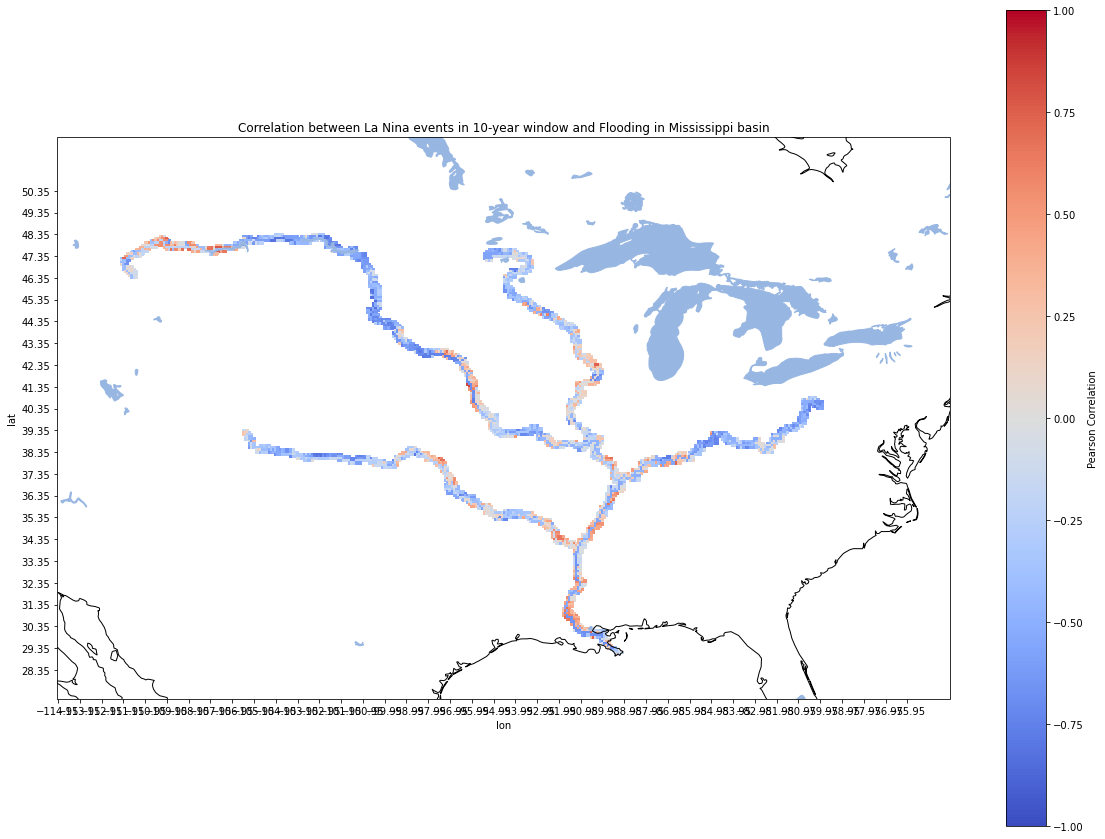

In [25]:
vs.plot_data(nina_data["lon"], nina_data["lat"], np.asarray(nina_data["pearson"]), "Pearson Correlation", "Correlation between La Nina events in 10-year window and Flooding in Mississippi basin",
         lon_min =-115 , lon_max=-74, lat_min =51 , lat_max =27, has_scale_bounds = True, scale_min = -1, scale_max = 1, has_rivers = False, file_name = "Nina plot")

0
223


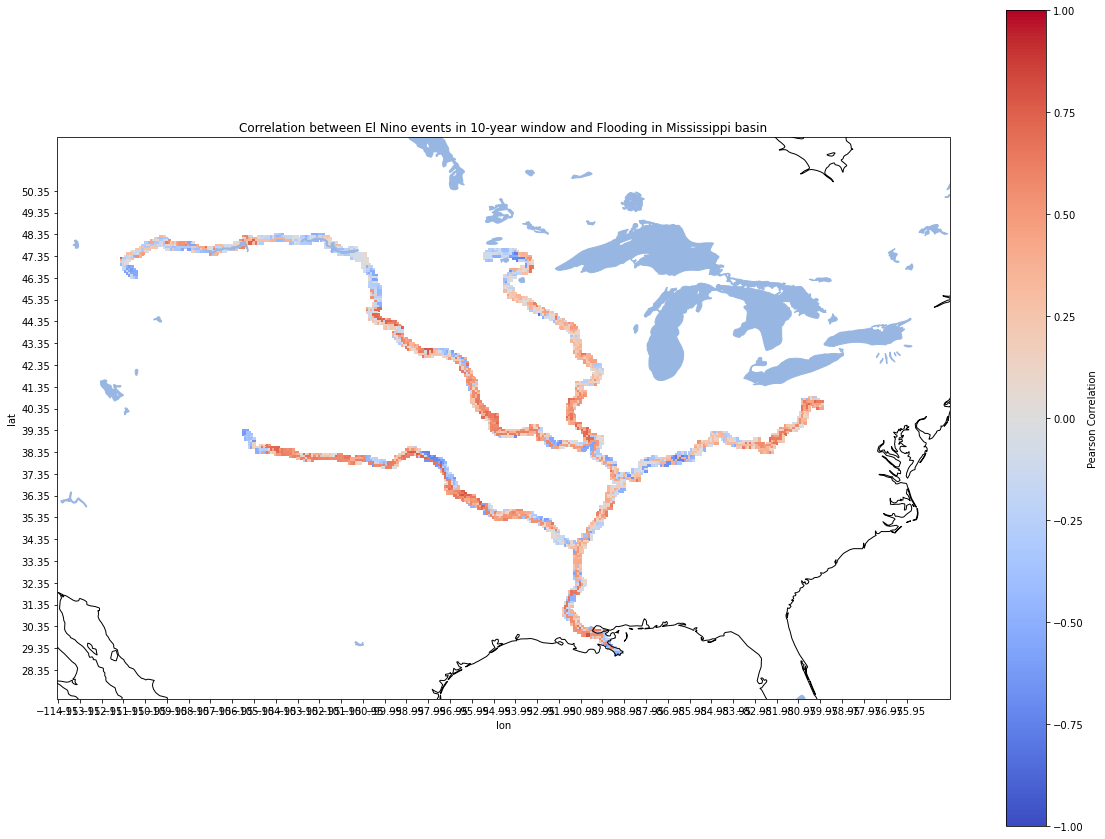

In [26]:
vs.plot_data(nino_data["lon"], nino_data["lat"], np.asarray(nino_data["pearson"]), "Pearson Correlation", "Correlation between El Nino events in 10-year window and Flooding in Mississippi basin",
         lon_min =-115 , lon_max=-74, lat_min =51 , lat_max =27, has_scale_bounds = True, scale_min = -1, scale_max = 1, has_rivers = False, file_name = "Nino plot")

0
223


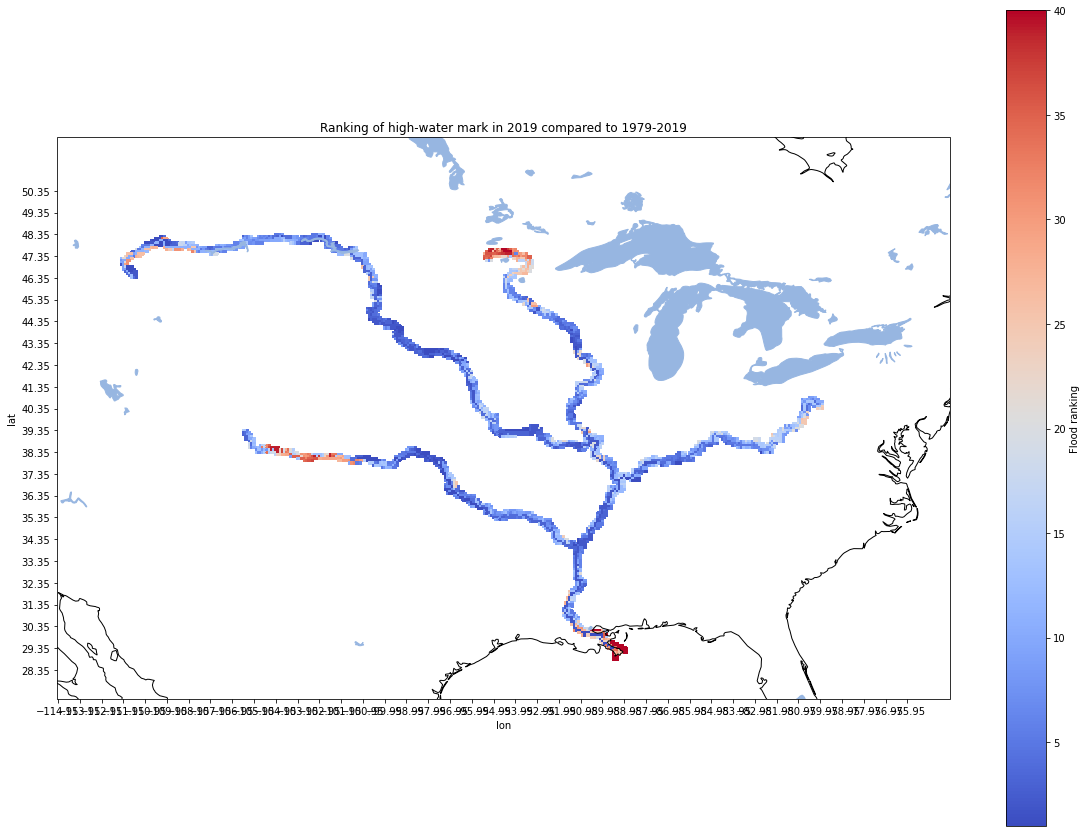

In [29]:
vs.plot_data(flood_trimmed["lon"], flood_trimmed["lat"], np.asarray(flood_trimmed["position"]), "Flood ranking", "Ranking of high-water mark in 2019 compared to 1979-2019",
         lon_min =-115 , lon_max=-74, lat_min =51 , lat_max =27, has_rivers = False)

0
223


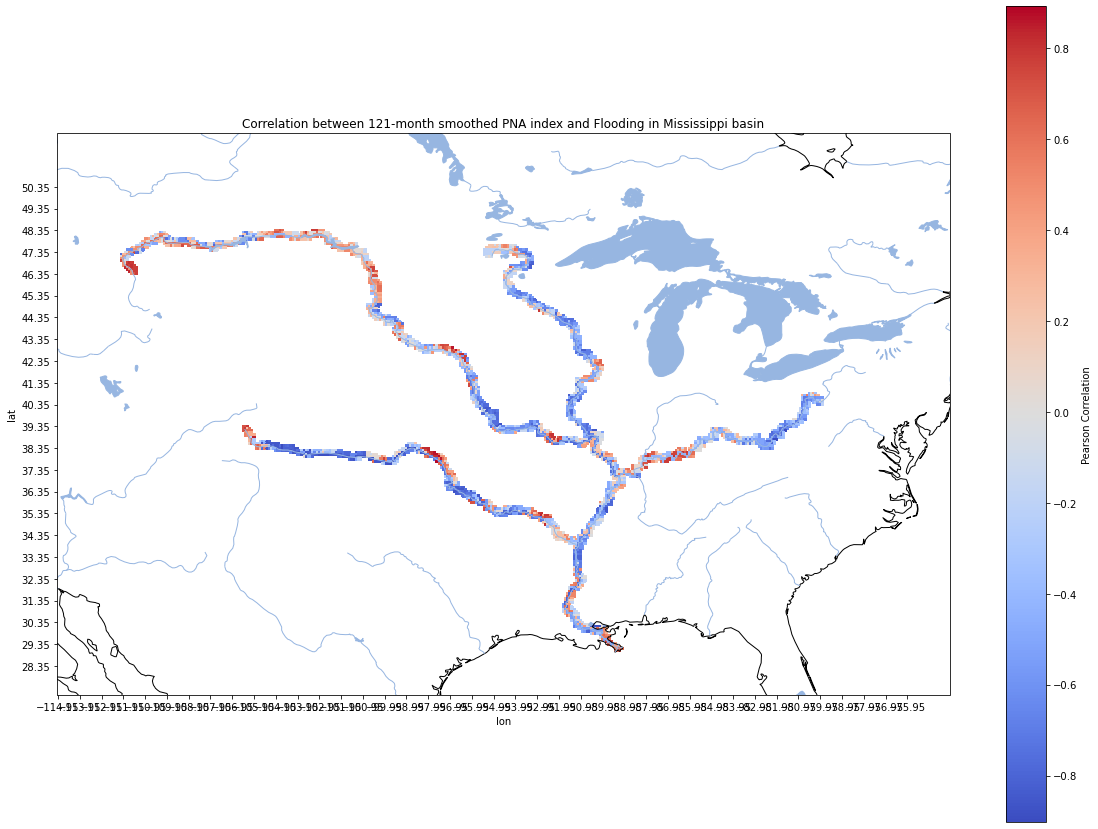

In [28]:
vs.plot_data(pna_trimmed["lon"], pna_trimmed["lat"], np.asarray(pna_trimmed["pearson"]), "Pearson Correlation", "Correlation between 121-month smoothed PNA index and Flooding in Mississippi basin",
         lon_min =-115 , lon_max=-74, lat_min =51 , lat_max =27, has_rivers = True)